# Problema de Elasticidad

Supóngase que, como consecuencia de determinadas acciones externas, en un dominio continuo, homogéneo, isótropo, lineal y elástico; se tiene el campo de desplazamientos expresados en las ecuaciones (1).

$$
u(x,y,z) = -\frac{x}{1600}(\frac{9x}{2} - y - 1) - \frac{z^2}{3200} - \frac{1}{2} \quad [m]
$$
$$$$
$$
v(x,y,z) = -\frac{y}{800}(-3x + y + 2) - \frac{z^2}{3200} \quad [m] \tag{1}
$$
$$$$
$$
w(x,y,z) = \frac{x + y - 4}{1600} \quad [m]
$$

### 1. Determine el tensor de deformaciones

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

In [2]:
from elasticity import DisplacementField

In [3]:
# Se declaran las tres variables simbólicas que definen el sistema de coordenadas
x, y, z = sym.symbols('x y z', real=True)
xyz = (x, y, z)

In [4]:
# Necesitamos generar una función que, dado un punto, devuelva el campo de desplazamientos en ese punto.
def gen_u(point):
    x, y, z = point
    u = np.array([-(x/1600)*(9*x/2 - y - 1) - (z**2)/3200 - 1/2,
                  -(y/800)*(-3*x + y + 2) - (z**2)/3200,
                  (x+y-4)/1600])
    return u

In [5]:
# u es un objeto DisplacementField, que requiere de un sistema de coordenadas y una función como la de antes.
u = DisplacementField(xyz, gen_u)
u.field

array([-x*(9*x/2 - y - 1)/1600 - z**2/3200 - 0.5,
       -y*(-3*x + y + 2)/800 - z**2/3200, x/1600 + y/1600 - 1/400], dtype=object)

In [6]:
# a partir de u podemos obtener ε, un objeto StrainTensor
ε = u.strain_tensor()
ε.tensor

array([[-9*x/1600 + y/1600 + 1/1600, x/3200 + 3*y/1600, -z/3200 + 1/3200],
       [x/3200 + 3*y/1600, 3*x/800 - y/400 - 1/400, -z/3200 + 1/3200],
       [-z/3200 + 1/3200, -z/3200 + 1/3200, 0]], dtype=object)

### 2. Suponiendo que el material tuviese coeficiente de Poisson ν = 1/4 y un módulo de elasticidad E = 210 GPa, determine el tensor de tensiones.

In [7]:
E = 210000 # no confundir con E_ (punto del polígono)
ν = 1/4

In [8]:
# a partir ε y las propiedades del material, podemos obtener σ, un objeto StressTensor
σ = ε.stress_tensor(E, ν)
σ.tensor

array([[-1102.5*x - 52.5*y - 52.5, 52.5*x + 315.0*y, -52.5*z + 52.5],
       [52.5*x + 315.0*y, 472.5*x - 577.5*y - 577.5, -52.5*z + 52.5],
       [-52.5*z + 52.5, -52.5*z + 52.5, -157.5*x - 157.5*y - 157.5]], dtype=object)

### 3. Determine y represente el tensor de tensiones en los puntos P, Q y R; de coordenadas: (0,0,0), (1m, 1m, 1m) y (−2m, 1m, 1m); respectivamente.

In [9]:
σ.evaluate((0,0,0))

array([[-52.5, 0.0, 52.5],
       [0.0, -577.5, 52.5],
       [52.5, 52.5, -157.5]], dtype=object)

In [10]:
σ.evaluate((1,1,1))

array([[-1207.5, 367.5, 0.0],
       [367.5, -682.5, 0.0],
       [0.0, 0.0, -472.5]], dtype=object)

In [11]:
σ.evaluate((-2,1,1))

array([[2100.0, 210.0, 0.0],
       [210.0, -2100.0, 0.0],
       [0.0, 0.0, 0.0]], dtype=object)

### 4. Obtenga y represente las tensiones y direcciones principales en cada uno de los puntos anteriores.

In [12]:
λs, vs = σ.principal_stress((0,0,0))
λs, vs

(array([ -29.99469185, -173.46392822, -584.04138184], dtype=float32),
 array([[ 0.91845614,  0.03775331,  0.3937169 ],
        [ 0.3953343 , -0.11835871, -0.91087979],
        [-0.0122111 , -0.99225295,  0.12363247]], dtype=float32))

In [13]:
# Igual para el resto de puntos

No podemos reprentar el paralelepípedo elemental. Pero, al menos, y solo por lo bonito que queda, vamos a reprentar las circunferencias de Möhr.

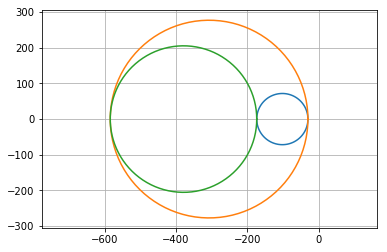

In [14]:
σ.draw_mohrs_circles((0, 0, 0))

### 5. Determine las fuerzas de volumen.

In [15]:
σ.body_forces()

(array([ 840.,    0.,    0.]),
 array([   0. ,  577.5,    0. ]),
 array([ 0.,  0.,  0.]))

### 6. Suponiendo que la geometría del dominio bajo estudio fuera la representada en la figura 1:
![Figura 1](figura_1.png)

In [16]:
from elasticity import Polygon

In [17]:
O = np.array([0, 0, 0])
A = np.array([3, 0, 0])
B = np.array([3, 1, 0])
C = np.array([3, 1, 0.5])
D = np.array([3, 0, 0.5])
E_ = np.array([0, 1, 0]) # no confundir con E (módulo de Young)
F = np.array([0, 1, 2.5])
G = np.array([0, 0, 2.5])

In [18]:
faces = [[O, A, B, E_], [O, A, D, G], [O, E_, F, G], [A, B, C, D], [B, C, F, E_], [C, D, G, F]]

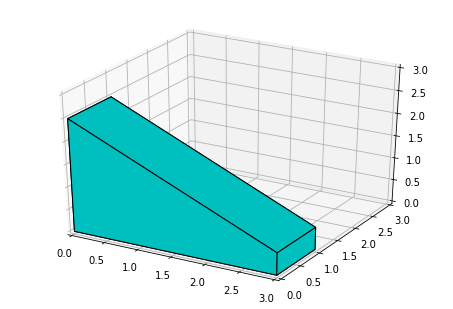

In [33]:
pol = Polygon(faces)
pol.draw()

#### 6.1 Determine y represente las acciones sobre las superficies del dominio.

In [20]:
normal_vectors = pol.normal_vectors()

In [21]:
η_CDFG = normal_vectors[5] # CDFG corresponde a la cara 5
η_CDFG

array([-0.5547002 ,  0.        , -0.83205029])

In [22]:
# El vector normal no es saliente, por lo que lo multiplicamos por -1.
η_CDFG *= -1

In [23]:
# El plano de la cara CDFG viene definido por x, y, -2*x/3 + 2.5
T_CDFG = σ.stress_vector(η_CDFG, (x, y, -2*x/3 + 2.5))
T_CDFG

array([-582.435206036491*x - 29.1217603018245*y - 94.6457209809297,
       58.2435206036491*x + 174.730561810947*y - 65.5239606791052,
       -111.633414490327*x - 131.04792135821*y - 174.730561810947], dtype=object)

In [24]:
# No podemos las acciones superficiales en 3D en la cara :(

#### 6.2 Determine el incremento de longitud sufrido por la línea OC.

In [25]:
ε.length_increment(O, C)

-0.017764765414828923

#### 6.3 Determine el incremento de superficie de la cara DCFG.

El método `rect_area_increment(pA, pB, pC)` calcula el incremento de un área rectangular definida por tres vértices contiguos pC, pA y pB, donde los vectores vAB y vAC deben ser perpendiculares.

In [26]:
ε.rect_area_increment(D, C, G)

-0.01144069154714536

#### 6.4 Determine el incremento de volumen.

In [27]:
# Hacemos la integral de volumen de la traza del tensor de deformaciones
sym.integrate(np.trace(ε.tensor), (z, 0, -2*x/3 + 2.5), (x, 0, 3), (y, 0, 1))

-0.0225000000000000

### 7. Supuesto que el material que compone el dominio fuese un material dúctil con tensión de plastificación σe = 3800MPa ¿qué se puede afirmar de la seguridad del dominio ante el estado de cargas que estaría soportando?

El procedimiento a seguir sería evaluar la tensión de equivalente en todo el dominio y calcular el máximo. Esta tarea resulta muy compleja porque es una función que depende de tres variables $(x, y, z)$.

Aquí se resuelve partiendo de que el punto más peligroso se encuentra en la línea DG.

In [28]:
σVM = σ.von_mises_stress((x, 0, -2*x/3 + 2.5))
σVM = σVM.simplify()
σVM

Unable to compute third invariant for symbolic tensor


sqrt(7603575.0*x**2 - 4895100.0*x + 1074937.5)/2

In [29]:
# Resolvemos la derivada de la función para averiguar el valor x del punto crítico.
sol = sym.solve([
    sym.diff(σVM, x)
], x)

sol

{x: 0.321894635089415}

In [30]:
# Sea Q el punto extremo de la función.
xQ = sol[x]
Q = np.array([xQ, 0, -2*xQ/3 + 2.5])

In [31]:
# Evaluamos Von Mises en cada uno de los puntos
σ.von_mises_stress(G), σ.von_mises_stress(Q), σ.von_mises_stress(D)

Unable to compute third invariant for symbolic tensor


(518.39596352595186, 267.901234546849, 3702.0875192247954)

In [32]:
# Q resulta ser un mínimo. El punto crítico es D
m = 3800/σ.von_mises_stress(D)
m

1.026447910879132